In [1]:
from Wavefronts import *
from Storage_Merge import *

import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation
from IPython import display

# More Efficient Algorithm

Intiate Algorithm 

In [2]:
Show_Reflection = False
Show_Circuit_Info = True
Save_Output = False
is_LCM = True

In [3]:
Storage_Voltage_Active.append(Wavefront_Source(Voltage_Souce_Magnitude,0,Voltage_Source_Period_On,0))
Storage_Voltage_Active[0].about()

temp_wavefront = Storage_Voltage_Active.popleft()
temp_wavefront.Generate(Storage_Away,Storage_Away)
Storage_Voltage_Completed.append(temp_wavefront)


Some Information about a wavefront
Type :                             <class 'Wavefronts.Wavefront_Source'>
Poisiton Start :                   0
Poisiton End :                     0
Time Start :                       0
Time End :                         0.000012
Voltage Magnitude :                1
Current Magnitude :                0
Excitation Type :                  HIGH
Excitation Number :                0
Order :                            0
Inductive Reflections :            0
Capacitive Reflections :           0
Current Chain Reflections :        0
Transmission Ind -> Cap :          0
Transmission Cap -> Ind :          0


In [4]:
About_Network()


Information about this network : 

- The Voltage Source -
Votage Source Magnitude :               1
Voltage Source Frequency :              50000
Voltage Source Duty cycle :             0.6
Voltage Souce Total Period :            0.00002
Voltage Souce ON Period :               0.000012
Voltage Souce OFF Period :              0.000008

- The Inductor -
Inductor Inductance Per Length :        115.0
Inductor Capacitance Per Length :       1.15
Inductor Length :                       1
Inductor Total Inductance :             115.0
Inductor Total Capacitance :            1.15
Inductor Velocity :                     0.08695652173913043478260869565
Inductor Time Delay :                   11.50000000000000000000000000
Inductor Impedance :                    10

- The Capacitor -
Capacitor Inductance Per Length :       0.35
Capacitor Capacitance Per Length :      35
Capacitor Length :                      1
Capacitor Total Inductance :            0.35
Capacitor Total Capacitance :           35

In [5]:
Process_Wavefronts()

In [6]:
def represent_Reflection_Diagram(ax):
    for wave in Storage_Capacitor_Completed:

        x1 = -wave.position_start
        x2 = -wave.position_end

        y1 = wave.time_start
        y2 = wave.time_end

        if(wave.time_start <=Simulation_Stop_Time):
            ax.plot([x1,x2],[y1,y2],'k-')


    for wave in Storage_Inductor_Completed:

        x1 = wave.position_start
        x2 = wave.position_end

        y1 = wave.time_start
        y2 = wave.time_end

        if(wave.time_start <=Simulation_Stop_Time):
            ax.plot([x1,x2],[y1,y2],'k-')

In [7]:
%matplotlib widget
#%matplotlib

if(Show_Reflection):
    fig_reflection, ax_reflection = plt.subplots()
    represent_Reflection_Diagram(ax_reflection)


## Position Equirey -> Time Waveform

In [8]:
Voltage_Array_Capacitor = []
Current_Array_Capacitor = []
Time_Array_Capacitor = []

def inspect_time_waveform_at_position(Wavefront_Array, position):

    Voltage_Array = []
    Current_Array = []
    Time_Array = []

    found_index = True

    for wave in Wavefront_Array:
        
        time = wave.Time_at_position(position)

        try:
            index = Time_Array.index(time)
            found_index = True
        except:
            found_index = False

        if(found_index == False):
            Time_Array.append(time)
            Voltage_Array.append(wave.magnitude_voltage)
            Current_Array.append(wave.magnitude_current)
        else:
            Voltage_Array[index] = Voltage_Array[index] + wave.magnitude_voltage
            Current_Array[index] = Current_Array[index] + wave.magnitude_current

    Time_Voltage_Current_Array = sorted(zip(Time_Array,Voltage_Array,Current_Array))
    
    Time_Array, Voltage_Array, Current_Array  = zip(*Time_Voltage_Current_Array)

    Time_Array = list( Time_Array )
    Voltage_Array = list( Voltage_Array )
    Current_Array = list( Current_Array )

    for i in range(1,len(Voltage_Array)-1):
        Voltage_Array[i] = Voltage_Array[i-1]+Voltage_Array[i] 
        Current_Array[i] = Current_Array[i-1]+Current_Array[i] 

    return Voltage_Array, Current_Array, Time_Array

Plot Inductor Voltage

In [9]:
def lcm(x, y):

    x_num,x_den = x.as_integer_ratio()
    y_num,y_den = y.as_integer_ratio()

    multiply_factor = x_den * y_den

    x_big = x_num * multiply_factor   
    y_big = y_num * multiply_factor   

    GCD = math.gcd(x_big,y_big)

    LCM = x_big* y_big/(GCD*multiply_factor)

    return LCM

In [10]:
position = 0

Voltage_Inductor, Current_Inductor, Time_Inductor = inspect_time_waveform_at_position(Storage_Inductor_Completed,position)
Voltage_Capacitor, Current_Capacitor, Time_Capacitor = inspect_time_waveform_at_position(Storage_Capacitor_Completed,position)

In [11]:
def Plot_Voltage_Current_Time_Multi(fig,ax,V_Inductor,I_Inductor,T_Inductor,V_Capacitor,I_Capacitor,T_Capacitor):

    grid_LCM = float(lcm(Inductor_Time*2,Capacitor_Time*2))
    Stop_Time_Multiple = math.floor(float(Simulation_Stop_Time)/grid_LCM)

    ax[0,0].set_title('Inductor Voltage')
    ax[0,0].set_xlabel('time (s)')
    ax[0,0].set_ylabel('Voltage (V)')
    ax[0,0].set_xlim(0,Simulation_Stop_Time)
    ax[0,0].step(T_Inductor ,V_Inductor,where='post')
    ax[0,0].set_xticks(np.arange(0,grid_LCM*Stop_Time_Multiple,grid_LCM))
    ax[0,0].grid()

    ax[0,1].set_title('Inductor Current')
    ax[0,1].set_xlabel('time (s)')
    ax[0,1].set_ylabel('Current (A)')
    ax[0,1].set_xlim(0,Simulation_Stop_Time)
    ax[0,1].step(T_Inductor ,I_Inductor,where='post')
    ax[0,1].set_xticks(np.arange(0,grid_LCM*Stop_Time_Multiple,grid_LCM))
    ax[0,1].grid()

    ax[1,0].set_title('Capacitor Voltage')
    ax[1,0].set_xlabel('time (s)')
    ax[1,0].set_ylabel('Voltage (V)')
    ax[1,0].set_xlim(0,Simulation_Stop_Time)
    ax[1,0].step(T_Capacitor ,V_Capacitor,where='post')
    ax[1,0].set_xticks(np.arange(0,grid_LCM*Stop_Time_Multiple,grid_LCM))
    ax[1,0].grid()

    ax[1,1].set_title('Capacitor Current')
    ax[1,1].set_xlabel('time (s)')
    ax[1,1].set_ylabel('Current (A)')
    ax[1,1].set_xlim(0,Simulation_Stop_Time)
    ax[1,1].step(T_Capacitor ,I_Capacitor,where='post')
    ax[1,1].set_xticks(np.arange(0,grid_LCM*Stop_Time_Multiple,grid_LCM))
    ax[1,1].grid()

    title = "Time Wavefroms of Capacitor and inductor at position " +str(position)+"m"

    fig.suptitle(title)
    fig.tight_layout()

NameError: name 'math' is not defined

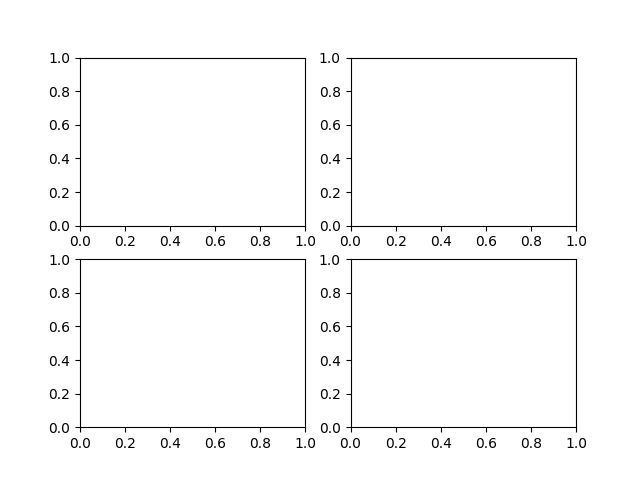

In [12]:
fig,ax = plt.subplots(2,2)

Plot_Voltage_Current_Time_Multi(fig,ax,Voltage_Inductor, Current_Inductor, Time_Inductor,Voltage_Capacitor, Current_Capacitor, Time_Capacitor)

In [ ]:
fig_power, ax_power = plt.subplots()

Power_Inductor = []

for (voltage, current) in zip(Voltage_Inductor,Current_Inductor):
    Power_Inductor.append(voltage*current)

Power_Capacitor = []

for (voltage, current) in zip(Voltage_Capacitor,Current_Capacitor):
    Power_Capacitor.append(voltage*current)

ax_power.set_xlabel('time (s)')
ax_power.set_ylabel('Power (w)')
ax_power.set_xlim(0,Simulation_Stop_Time)
ax_power.step(Time_Inductor ,Power_Inductor,where='post',label='Inductor')
ax_power.step(Time_Capacitor ,Power_Capacitor,where='post', label = 'Capacitor')

grid_LCM = float(lcm(Inductor_Time*2,Capacitor_Time*2))
Stop_Time_Multiple = math.floor(float(Simulation_Stop_Time)/grid_LCM)
ax_power.set_xticks(np.arange(0,grid_LCM*Stop_Time_Multiple,grid_LCM))
ax_power.grid()

title = "Power Wavefroms of Capacitor and inductor at position " +str(position)+"m"


fig_power.suptitle(title)
fig_power.tight_layout()
fig_power.legend(loc='lower left')

In [ ]:
def inspect_spatial_waveform_at_time(Wavefront_Array, time):
    
    Voltage_In_Position = []
    Current_In_Position = []
    Positions = []

    Current_Forward = []
    Current_Backward = []

    Voltage_Forward = []
    Voltage_Backward = []

    Positions_Forward = []
    Positions_Backward = []

    found_index = True

    query_time = time
    DC_Current = 0
    DC_Voltage = 0
    length = 0

    for wave in Wavefront_Array:

        position = 0
        length = wave.length

        position = wave.Position_at_time(query_time)

        if position >= 0:

            if wave.position_start == 0:
                try:
                    index = Positions_Forward.index(position)
                    found_index = True
                except:
                    found_index = False

                if found_index:
                    Current_Forward[index] += wave.magnitude_current
                    Voltage_Forward[index] += wave.magnitude_voltage
                else:
                    Positions_Forward.append(position)
                    Current_Forward.append(wave.magnitude_current)
                    Voltage_Forward.append(wave.magnitude_voltage)

                    Positions.append(position)

            else:
                try:
                    index = Positions_Backward.index(position)
                    found_index = True
                except:
                    found_index = False

                if found_index:
                    Current_Backward[index] += wave.magnitude_current
                    Voltage_Backward[index] += wave.magnitude_voltage
                else:
                    Positions_Backward.append(position)
                    Current_Backward.append(wave.magnitude_current)
                    Voltage_Backward.append(wave.magnitude_voltage)

                    Positions.append(position)


        elif wave.time_end <= query_time:
            DC_Current += wave.magnitude_current
            DC_Voltage += wave.magnitude_voltage

    Forward_Zip = list(zip(Positions_Forward,Voltage_Forward,Current_Forward))
    Backward_Zip = list(zip(Positions_Backward,Voltage_Backward,Current_Backward))

    #Remove doubles
    Positions = list(set(Positions))
    Positions = sorted(Positions)

    Positions.append(length)
    Positions = [0] + Positions

    Current_In_Position = [DC_Current]*len(Positions)
    Voltage_In_Position = [DC_Voltage]*len(Positions)

    # Current_In_Position_Sorted_Capacitor = sorted(zip(Positions,Current_In_Position))


    for pos,forward_voltage,forward_current in Forward_Zip:

        index = Positions.index(pos)

        for i in range(0,index):
            Current_In_Position[i] += forward_current
            Voltage_In_Position[i] += forward_voltage

    for pos,backward_voltage,backward_current in Backward_Zip:

        index = Positions.index(pos)

        for i in range(index,len(Positions)):
            Current_In_Position[i] += backward_current
            Voltage_In_Position[i] += backward_voltage

    return Voltage_In_Position,Current_In_Position,Positions

In [ ]:
fig_Current_In_Position_capacitor, (ax_Voltage_In_Position_capacitor, ax_Current_In_Position_capacitor) = plt.subplots(2,1)

time = Simulation_Stop_Time/2
Capacitor_Voltage_in_Position,Capacitor_Current_in_Position, Capacitor_Positions = inspect_spatial_waveform_at_time(Storage_Inductor_Completed,time)

ax_Voltage_In_Position_capacitor.set_title("Voltage")
ax_Voltage_In_Position_capacitor.set_xlabel('Position (m)')
ax_Voltage_In_Position_capacitor.set_ylabel('Voltage (V)')
ax_Voltage_In_Position_capacitor.step(Capacitor_Positions,Capacitor_Voltage_in_Position,where='post')

ax_Current_In_Position_capacitor.set_title("Current")
ax_Current_In_Position_capacitor.set_xlabel('Position (m)')
ax_Current_In_Position_capacitor.set_ylabel('Current (A)')
ax_Current_In_Position_capacitor.step(Capacitor_Positions,Capacitor_Current_in_Position,where='post')

title = "Spatial Waveform at : " + str(time) + "s"

fig_Current_In_Position_capacitor.suptitle(title)
fig_Current_In_Position_capacitor.tight_layout()

# How to Save and Load data 

first save the lists

In [ ]:
import pickle

if(Save_Output):
    Inductor_Zip = zip(Voltage_Inductor, Current_Inductor, Time_Inductor)
    filename = "Inductor" +"_I_"+ str(Inductor_Total_Inductance) + "_C_" + str(Capacitor_Total_Capacitance)

    with open(filename, 'wb') as f: 
        pickle.dump(Inductor_Zip, f) 

    Capacitor_Zip = zip(Voltage_Capacitor, Current_Capacitor, Time_Capacitor)
    filename = "Capacitor" +"_I_"+ str(Inductor_Total_Inductance) + "_C_" + str(Capacitor_Total_Capacitance)

    with open(filename, 'wb') as f: 
        pickle.dump(Capacitor_Zip, f) 

Then load them like so:

In [ ]:
if(Save_Output):
    with open('LC_Output\Inductor_I_35.0_C_25.0', 'rb') as f: 
        loaded_Inductor = pickle.load(f) 

    Voltage_loaded,Current_Loaded,Time_Loaded = zip(*loaded_Inductor)

    Voltage_loaded = list(Voltage_loaded)
    Current_Loaded = list(Current_Loaded)
    Time_Loaded = list(Time_Loaded)

In [ ]:
lcm(Decimal('23'),Decimal('7'))

import pickle

with open('BUCK_Output\Inductor_I_35.0_C_25.0', 'rb') as f: 
        loaded_Inductor = pickle.load(f) 

Voltage_loaded,Current_Loaded,Time_Loaded = zip(*loaded_Inductor)

Voltage_Inductor_Loaded = list(Voltage_loaded)
Current_Inductor_Loaded = list(Current_Loaded)
Time_Inductor_Loaded = list(Time_Loaded)

with open('BUCK_Output\Capacitor_I_35.0_C_25.0', 'rb') as f: 
        loaded_Inductor = pickle.load(f) 

Voltage_loaded,Current_Loaded,Time_Loaded = zip(*loaded_Inductor)

Voltage_Capacitor_Loaded = list(Voltage_loaded)
Current_Capacitor_Loaded = list(Current_Loaded)
Time_Capacitor_Loaded = list(Time_Loaded)

fig,ax = plt.subplots(2,2)
position = 0

Plot_Voltage_Current_Time_Multi(fig,ax,Voltage_Inductor_Loaded, Current_Inductor_Loaded, Time_Inductor_Loaded,Voltage_Capacitor_Loaded, Current_Capacitor_Loaded, Time_Capacitor_Loaded)